In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


In [34]:
data = load_breast_cancer()
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=['target'])
df = pd.concat([df_features, df_target], axis =1)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, random_state=43, test_size=0.2)

In [36]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.021790,0.2019,0.06290,0.2747,1.2030,1.930,19.53,0.009895,0.030530,0.016300,0.009276,0.02258,0.002272,13.05,27.21,85.09,522.9,0.1426,0.21870,0.116400,0.08263,0.3075,0.07351
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.178400,0.114400,0.1893,0.06232,0.8426,1.1990,7.158,106.40,0.006356,0.047650,0.038630,0.015190,0.01936,0.005252,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.425100,0.19410,0.2818,0.10050
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,0.2864,1.4400,2.206,20.30,0.007278,0.020470,0.044470,0.008799,0.01868,0.003339,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.088170,0.029250,0.1473,0.05746,0.2535,1.3540,1.994,23.04,0.004147,0.020480,0.033790,0.008848,0.01394,0.002327,16.30,28.39,108.10,830.5,0.1089,0.26490,0.377900,0.09594,0.2471,0.07463
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.038730,0.023770,0.1829,0.05667,0.1942,0.9086,1.493,15.75,0.005298,0.015870,0.023210,0.008420,0.01853,0.002152,13.88,22.00,90.81,600.6,0.1097,0.15060,0.176400,0.08235,0.3024,0.06949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.011620,0.019980,0.011090,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.291400,0.16090,0.3029,0.08216
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.2140,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
277,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,0.3283,0.8280,2.363,36.74,0.007571,0.011140,0.026230,0.014630,0.01930,0.001676,19.96,24.30,129.00,1236.0,0.1243,0.11600,0.221000,0.12940,0.2567,0.05737
255,13.96,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,0.1908,0.06130,0.4250,0.8098,2.563,35.74,0.006351,0.026790,0.031190,0.013420,0.02062,0.002695,16.39,22.07,108.10,826.0,0.1512,0.32620,0.320900,0.13740,0.3068,0.07957


In [37]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [39]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [43]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print results
    print(f"--- {name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

--- Decision Tree ---
Confusion Matrix:
[[38  1]
 [ 6 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.99      0.92      0.95        75

    accuracy                           0.94       114
   macro avg       0.92      0.95      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy: 0.94



/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--- Random Forest ---
Confusion Matrix:
[[38  1]
 [ 0 75]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.99      1.00      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy: 0.99

--- K-Nearest Neighbors ---
Confusion Matrix:
[[37  2]
 [ 1 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.97



/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_dt = GridSearchCV(dt, param_grid_dt, scoring='f1', cv=5)
grid_dt.fit(X_train, y_train)

# Random Forest Model
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5)
grid_rf.fit(X_train, y_train)

# K-Nearest Neighbors Model
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_knn = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=5)
grid_knn.fit(X_train, y_train)

/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/Machine-Learning/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

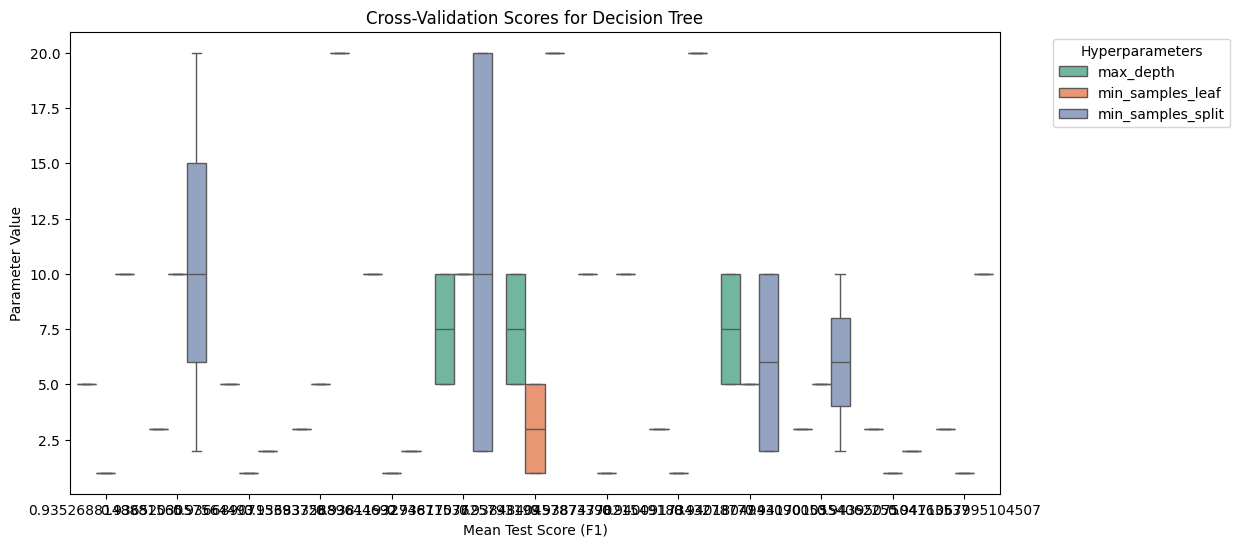

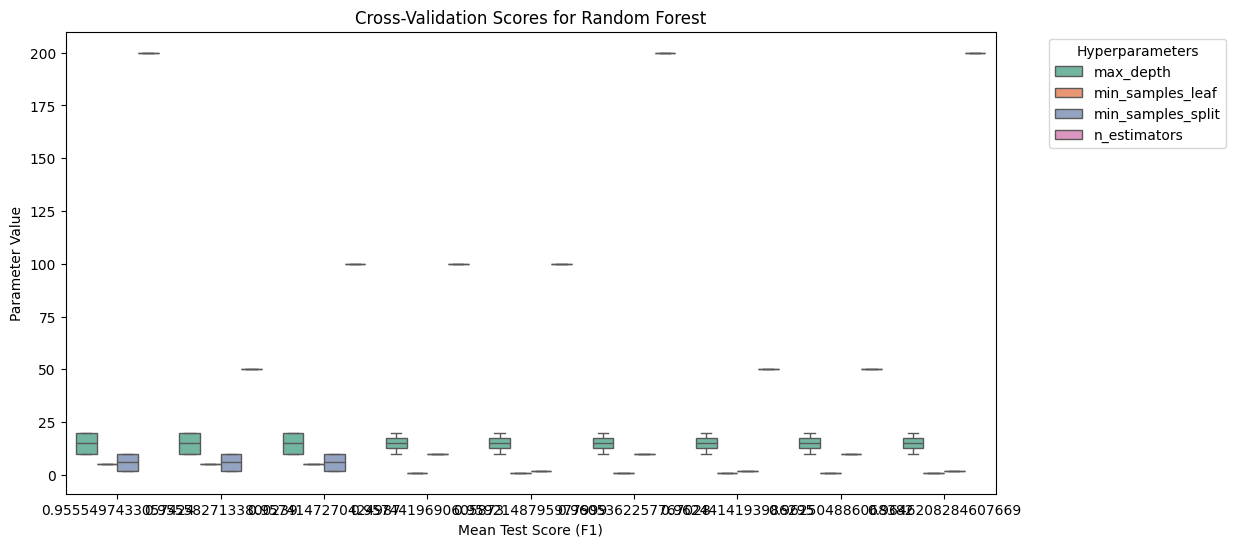

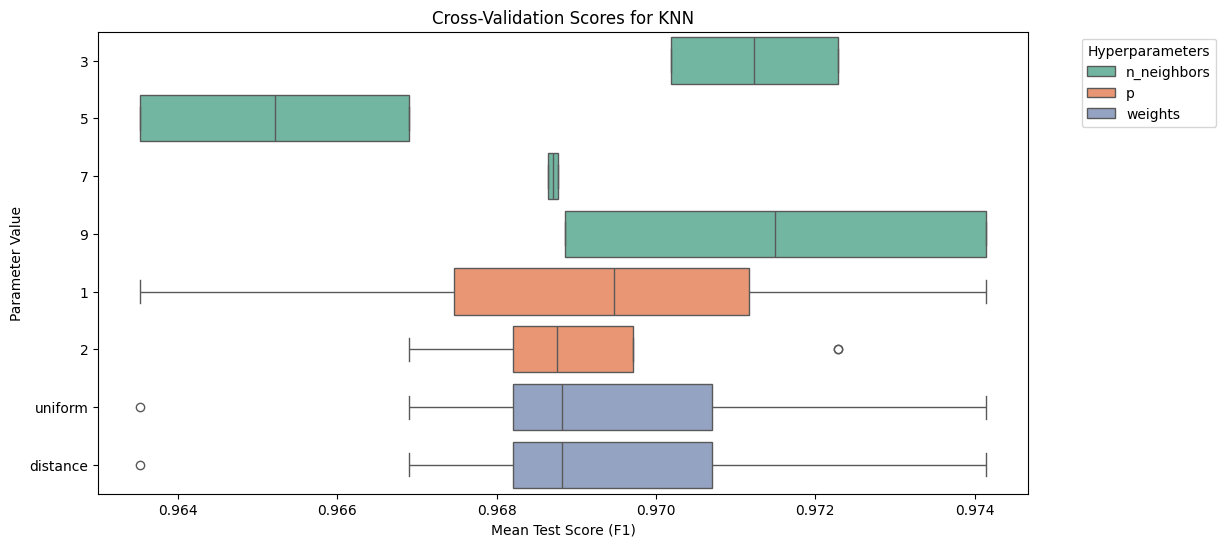

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(cv_results, model_name):
    # Create a DataFrame from cv_results
    results_df = pd.DataFrame(cv_results)

    # Extract parameters into separate columns
    params_df = pd.json_normalize(results_df['params'])
    
    # Concatenate the mean_test_score with params DataFrame
    plot_df = pd.concat([results_df['mean_test_score'], params_df], axis=1)

    # Melt the DataFrame to long format for seaborn
    plot_df = plot_df.melt(id_vars='mean_test_score', var_name='Parameter', value_name='Value')

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=plot_df, x='mean_test_score', y='Value', hue='Parameter', palette='Set2')
    plt.title(f'Cross-Validation Scores for {model_name}')
    plt.xlabel('Mean Test Score (F1)')
    plt.ylabel('Parameter Value')
    plt.legend(title='Hyperparameters', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Call this function for each model after GridSearchCV
plot_boxplots(grid_dt.cv_results_, "Decision Tree")
plot_boxplots(grid_rf.cv_results_, "Random Forest")
plot_boxplots(grid_knn.cv_results_, "KNN")


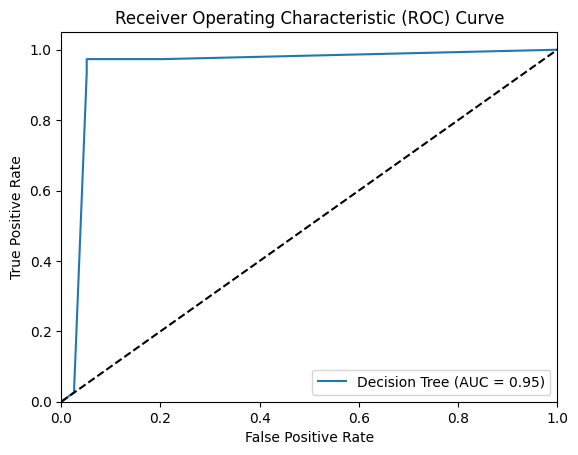

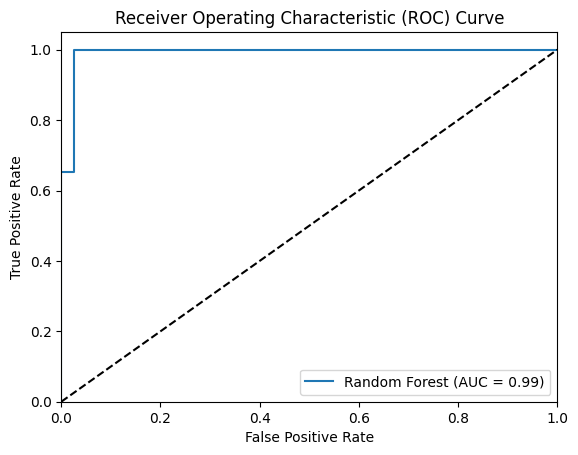

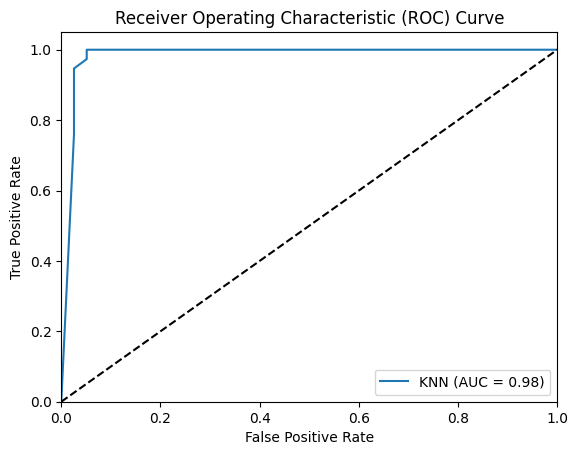

In [48]:
# Step 4: ROC Curve

from sklearn.metrics import roc_curve

def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(grid_dt.best_estimator_, X_test, y_test, "Decision Tree")
plot_roc_curve(grid_rf.best_estimator_, X_test, y_test, "Random Forest")
plot_roc_curve(grid_knn.best_estimator_, X_test, y_test, "KNN")


In [49]:
# Step 5: Model Selection
# Compare the models based on the metrics DataFrame created earlier

# Print the metrics DataFrame
print(metrics_df)

# Based on the metrics, choose the best model
best_model = metrics_df.loc[metrics_df['F1 Score'].idxmax()]
print(f"Best Model: {best_model['Model']}")
print(f"F1 Score: {best_model['F1 Score']:.2f}")

# Conclusions
# In the last cell of your notebook, summarize your findings and justifications for model selection.


           Model  Accuracy  Precision  ...  Specificity  F1 Score       AUC
0  Decision Tree  0.964912   0.973333  ...     0.948718  0.973333  0.946667
1  Random Forest  0.982456   0.974026  ...     0.948718  0.986842  0.991111
2            KNN  0.973684   0.973684  ...     0.948718  0.980132  0.983077

[3 rows x 7 columns]
Best Model: Random Forest
F1 Score: 0.99
